In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
df_data = pd.read_csv('college-scorecard-raw-data-030216/merged_2013_PP.csv', encoding='iso-8859-1',
                      na_values="PrivacySuppressed")
df_data.info()

C:\Users\soumya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Columns: 1729 entries, UNITID to C200_4_POOLED_SUPP
dtypes: float64(1710), int64(12), object(7)
memory usage: 102.9+ MB


In [3]:
df_selected = df_data[['st_fips', 'region', 'LOCALE', 'locale2', 'LATITUDE', 'LONGITUDE', 'C150_4']]

In [4]:
df_selected.isnull().sum()

st_fips         0
region          0
LOCALE        424
locale2      7804
LATITUDE      785
LONGITUDE     785
C150_4       5356
dtype: int64

In [5]:
df_final = df_selected.drop('locale2', 1).dropna()
df_final.shape

(2405, 6)

In [6]:
df_final.describe()

,st_fips,region,LOCALE,LATITUDE,LONGITUDE,C150_4
count,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000
mean,29.896881,4.369647,19.425364,37.876637,-88.616342,0.478179
std,16.385417,2.152890,9.361297,5.979608,17.591356,0.212840
min,1.000000,0.000000,11.000000,-14.322600,-170.742700,0.000000
25%,17.000000,3.000000,11.000000,34.418600,-95.419100,0.329400
50%,30.000000,4.000000,13.000000,39.387800,-84.638700,0.467900
75%,42.000000,5.000000,22.000000,41.718800,-77.472300,0.624200
max,78.000000,9.000000,43.000000,64.857100,145.721700,1.000000


In [7]:
icorr = df_final.corr()

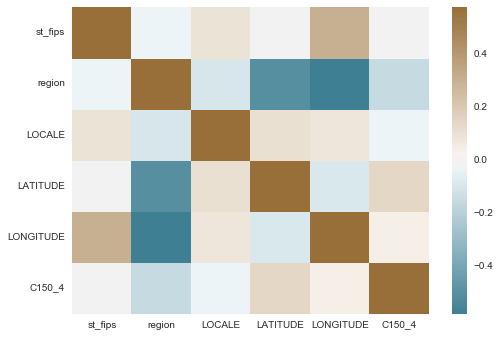

In [8]:
sns.heatmap(icorr, cmap=sns.diverging_palette(220, 50, as_cmap=True), vmax=.5)

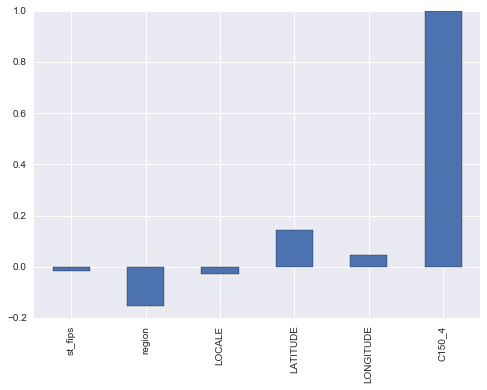

In [9]:
comp_corr_num = icorr['C150_4']
comp_corr_num.plot(kind='bar')

In [41]:
X = df_final.values
X = scale(X)
pca = PCA(n_components=5)

pca.fit(X)

#The amount of variance that each PC explains
pca.explained_variance_ratio_

array([ 0.3078963 ,  0.21207506,  0.17021739,  0.14951453,  0.13363059])

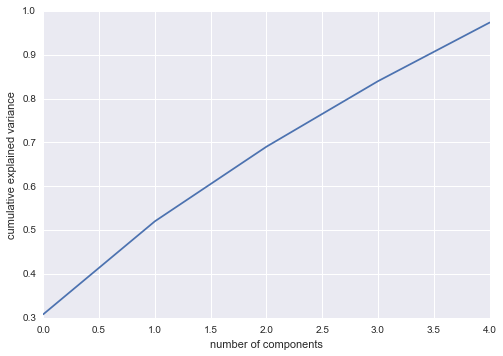

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()